In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report

from sklearn import metrics

from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0)

#set options for display
pd.options.display.max_rows = 1000
pd.options.display.max_columns =100
pd.options.display.float_format = '{:.2f}'.format


In [3]:
# load datafile

df = pd.read_csv('train.csv')
df.head(2)

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh 23.00 821000265.00  Scientist   
1  5635         3392      2  Aaron Maashoh 23.00 821000265.00  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12                1824.84               3.00             4.00   
1       19114.12                1824.84               3.00             4.00   

   Interest_Rate  Num_of_Loan  \
0           3.00         4.00   
1           3.00         4.00   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    7.00                 11.27                  4.00   
1                    4.00                 11.27                  4.00   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                     26.82              265.00   
1       Good            809.98                     31.94              266.00   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No                49.57                    21.47   
1                    No                49.57                    21.47   

                 Payment_Behaviour  Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments           312.49         Good  
1   Low_spent_Large_value_payments           284.63         Good

In [4]:
#df.columns = [x.lower() for x in df.columns]
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# Checking Data quality

In [5]:
df.shape

(100000, 28)

In [6]:
# dropping the non neaded columns 
df.drop(['id', 'customer_id', 'month', 'name',
         'ssn', 'type_of_loan', 'credit_history_age'],
        axis=1, inplace= True)

KeyError: "['id', 'customer_id', 'month', 'name', 'ssn', 'type_of_loan', 'credit_history_age'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       100000 non-null  float64
 1   occupation                100000 non-null  object 
 2   annual_income             100000 non-null  float64
 3   monthly_inhand_salary     100000 non-null  float64
 4   num_bank_accounts         100000 non-null  float64
 5   num_credit_card           100000 non-null  float64
 6   interest_rate             100000 non-null  float64
 7   num_of_loan               100000 non-null  float64
 8   delay_from_due_date       100000 non-null  float64
 9   num_of_delayed_payment    100000 non-null  float64
 10  changed_credit_limit      100000 non-null  float64
 11  num_credit_inquiries      100000 non-null  float64
 12  credit_mix                100000 non-null  object 
 13  outstanding_debt          100000 non-null  fl

In [ ]:
df.duplicated().value_counts()

False    100000
Name: count, dtype: int64

In [ ]:
df.isnull().sum().reset_index()

index  0
0                        age  0
1                 occupation  0
2              annual_income  0
3      monthly_inhand_salary  0
4          num_bank_accounts  0
5            num_credit_card  0
6              interest_rate  0
7                num_of_loan  0
8        delay_from_due_date  0
9     num_of_delayed_payment  0
10      changed_credit_limit  0
11      num_credit_inquiries  0
12                credit_mix  0
13          outstanding_debt  0
14  credit_utilization_ratio  0
15     payment_of_min_amount  0
16       total_emi_per_month  0
17   amount_invested_monthly  0
18         payment_behaviour  0
19           monthly_balance  0
20              credit_score  0

In [ ]:
df.tail(2)

age occupation  annual_income  monthly_inhand_salary  \
99998 25.00   Mechanic       39628.99                3359.42   
99999 25.00   Mechanic       39628.99                3359.42   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
99998               4.00             6.00           7.00         2.00   
99999               4.00             6.00           7.00         2.00   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
99998                20.00                    6.00                 11.50   
99999                18.00                    6.00                 11.50   

       num_credit_inquiries credit_mix  outstanding_debt  \
99998                  3.00       Good            502.38   
99999                  3.00       Good            502.38   

       credit_utilization_ratio payment_of_min_amount  total_emi_per_month  \
99998                     33.64                    No                35.10   
99999                     34.19                    No                35.10   

       amount_invested_monthly                 payment_behaviour  \
99998                    24.03    Low_spent_Large_value_payments   
99999                    24.03  High_spent_Medium_value_payments   

       monthly_balance credit_score  
99998           319.16     Standard  
99999           393.67         Poor

In [ ]:
df.shape

(100000, 21)

In [ ]:
df.columns

Index(['age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'payment_of_min_amount',
       'total_emi_per_month', 'amount_invested_monthly', 'payment_behaviour',
       'monthly_balance', 'credit_score'],
      dtype='object')

(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

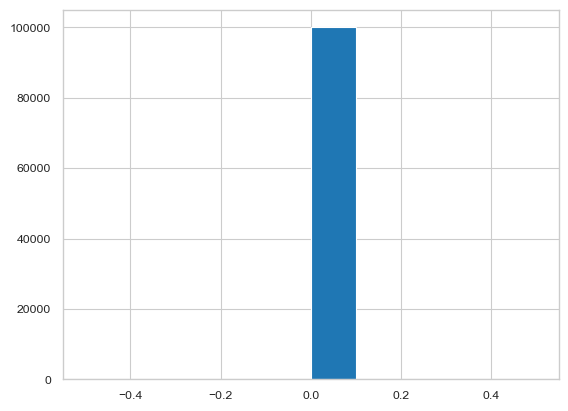

In [ ]:
plt.hist(df.age.isna())

# EDA_ 

# categorical data and numerical data seperation

In [ ]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='number')

# Categorical Data

In [ ]:
df_cat.describe().T

count unique                             top   freq
Name                   100000  10128                        Jessicad     48
Occupation             100000     15                          Lawyer   7096
Type_of_Loan           100000   6261                         No Data  11408
Credit_Mix             100000      3                        Standard  45848
Payment_of_Min_Amount  100000      3                             Yes  52326
Payment_Behaviour      100000      6  Low_spent_Small_value_payments  28616
Credit_Score           100000      3                        Standard  53174

In [ ]:
for col in df_cat:
    print(df_cat[col].value_counts())
    print('\n-------------------')

Name
Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: count, Length: 10128, dtype: int64

-------------------
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

-------------------
Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                        

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def cat_plot(df):
    for col in df:
        plt.figure(figsize=(10,4))
        ax = sns.countplot(x=col, data=df)
        plt.title(f'Distribution of Count of {col}')
        plt.xlabel(f'{col}')
        plt.ylabel(f'{col} Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels to 45 degrees
        for p in ax.patches:
            ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50))


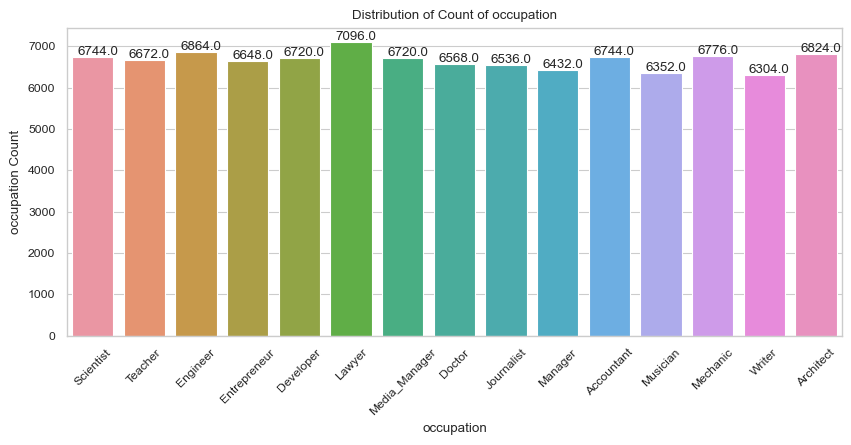

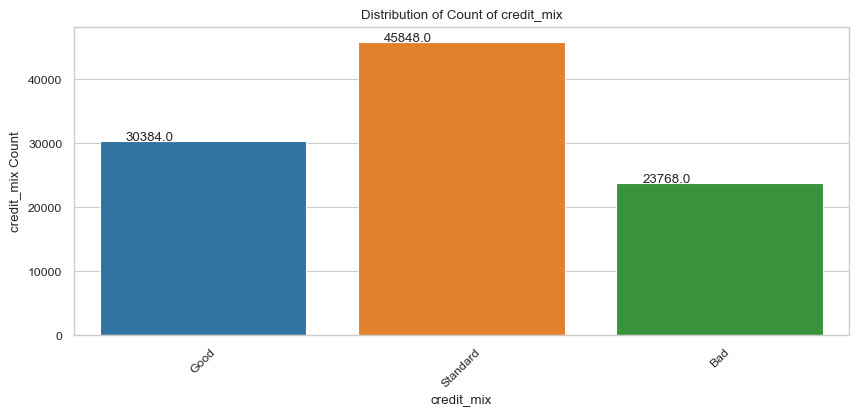

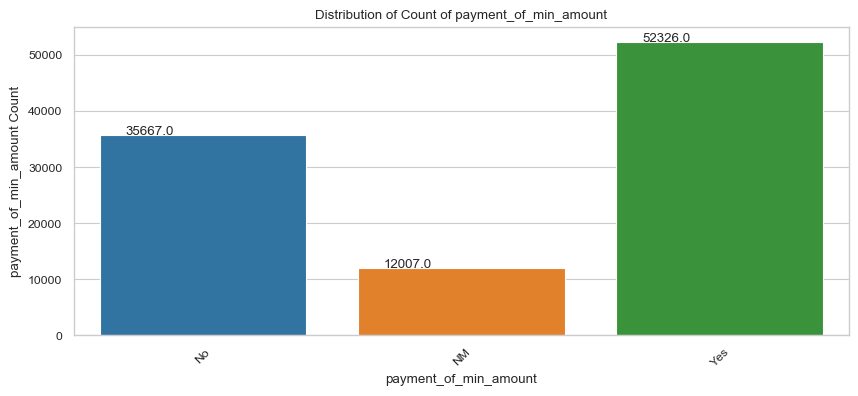

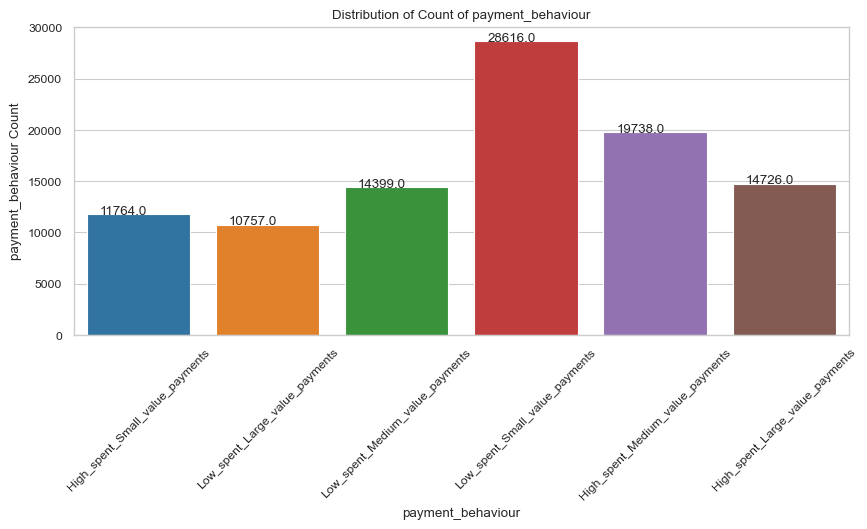

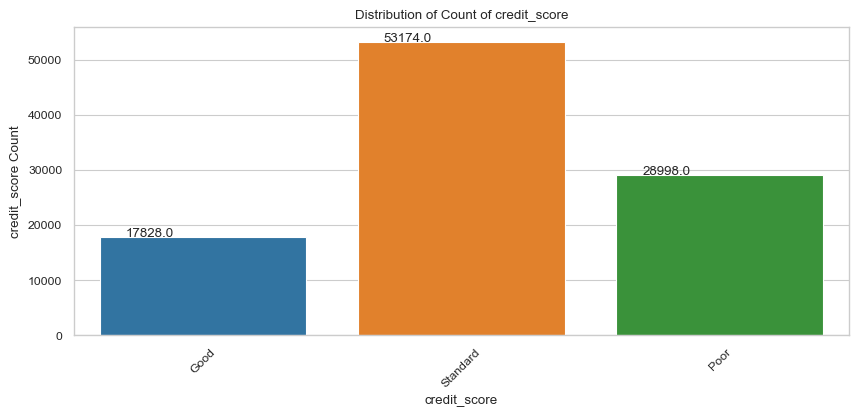

In [ ]:
cat_plot(df_cat)

# Numerical Data 

In [ ]:
df_num.describe()

age  annual_income  monthly_inhand_salary  num_bank_accounts  \
count 100000.00      100000.00              100000.00          100000.00   
mean      33.32       50505.12                4197.27               5.37   
std       10.76       38299.42                3186.43               2.59   
min       14.00        7005.93                 303.65               0.00   
25%       24.00       19342.97                1626.59               3.00   
50%       33.00       36999.71                3095.91               5.00   
75%       42.00       71683.47                5957.72               7.00   
max       56.00      179987.28               15204.63              11.00   

       num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
count        100000.00      100000.00    100000.00            100000.00   
mean              5.53          14.53         3.53                21.08   
std               2.07           8.74         2.45                14.80   
min               0.00           1.00         0.00                 0.00   
25%               4.00           7.00         2.00                10.00   
50%               5.00          13.00         3.00                18.00   
75%               7.00          20.00         5.00                28.00   
max              11.00          34.00         9.00                62.00   

       num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
count               100000.00             100000.00             100000.00   
mean                    13.31                 10.47                  5.80   
std                      6.24                  6.61                  3.87   
min                      0.00                  0.50                  0.00   
25%                      9.00                  5.38                  3.00   
50%                     14.00                  9.40                  5.00   
75%                     18.00                 14.85                  8.00   
max                     25.00                 29.98                 17.00   

       outstanding_debt  credit_utilization_ratio  total_emi_per_month  \
count         100000.00                 100000.00            100000.00   
mean            1426.22                     32.29               107.70   
std             1155.13                      5.12               132.27   
min                0.23                     20.00                 0.00   
25%              566.07                     28.05                29.27   
50%             1166.15                     32.31                66.46   
75%             1945.96                     36.50               147.39   
max             4998.07                     50.00              1779.10   

       amount_invested_monthly  monthly_balance  
count                100000.00        100000.00  
mean                     55.10           392.70  
std                      39.01           201.65  
min                       0.00             0.01  
25%                      27.96           267.62  
50%                      45.16           333.87  
75%                      71.30           463.22  
max                     434.19          1183.93

In [ ]:
#sns.pairplot(df_num)

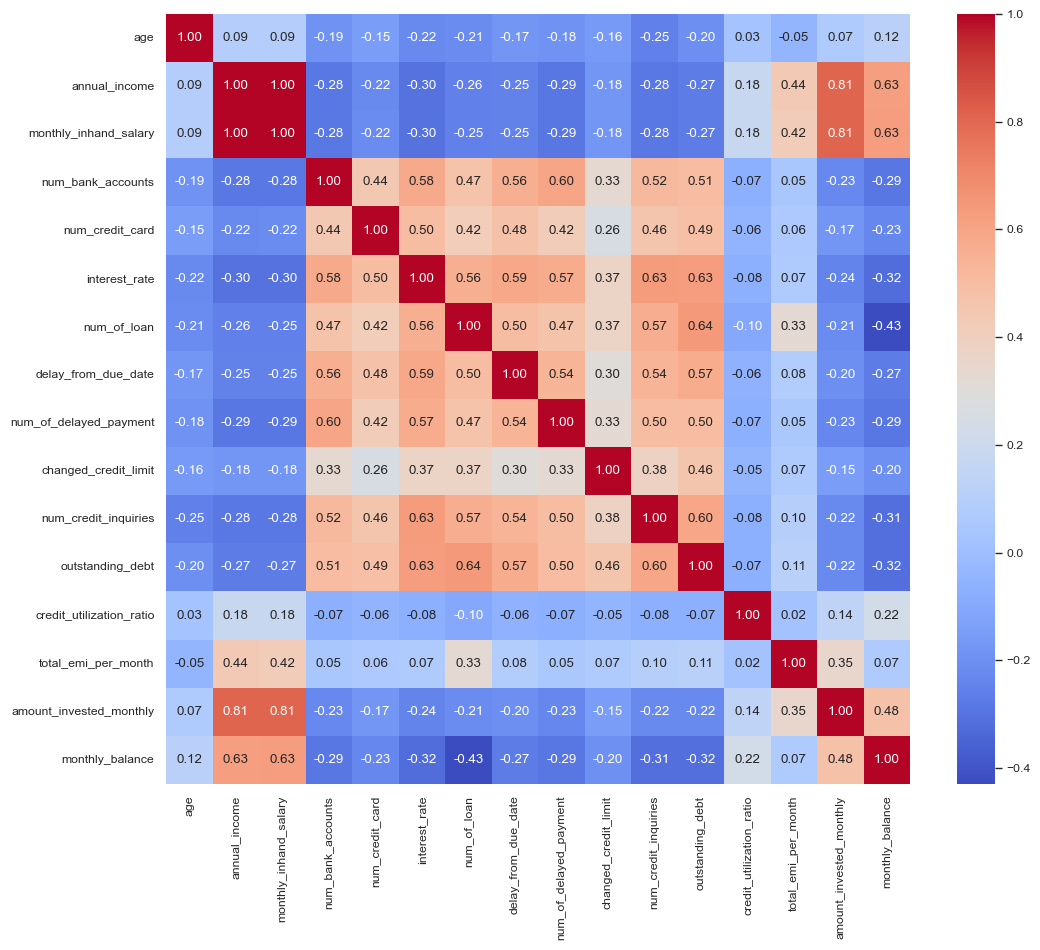

In [ ]:
# preparing corellation matrix
corr_matrix = df_num.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Show plot
plt.show()

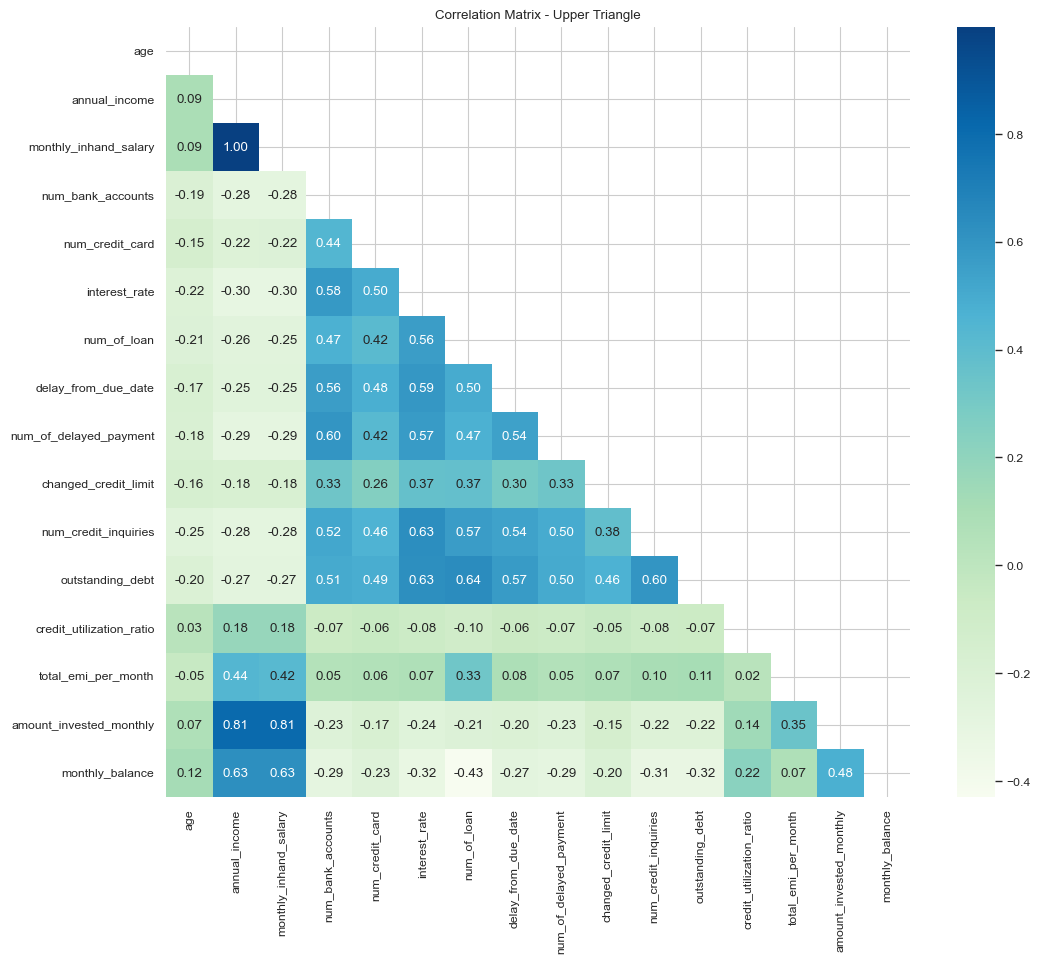

In [ ]:
# creating correlation matrix 
corr_matrix = df_num.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Alternatively, for the lower triangle, use: 
# mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='GnBu',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

# Add title
plt.title("Correlation Matrix - Upper Triangle")

# Show plot
plt.show()


In [ ]:
df.head(2)

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh 23.00 821000265.00  Scientist   
1  5635         3392      2  Aaron Maashoh 23.00 821000265.00  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12                1824.84               3.00             4.00   
1       19114.12                1824.84               3.00             4.00   

   Interest_Rate  Num_of_Loan  \
0           3.00         4.00   
1           3.00         4.00   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    7.00                 11.27                  4.00   
1                    4.00                 11.27                  4.00   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                     26.82              265.00   
1       Good            809.98                     31.94              266.00   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No                49.57                    21.47   
1                    No                49.57                    21.47   

                 Payment_Behaviour  Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments           312.49         Good  
1   Low_spent_Large_value_payments           284.63         Good

In [ ]:
import plotly.express as px

def credit_score_impact(df, col_name):    
    fig = px.box(df, 
                 x="credit_score", 
                 y=col_name, 
                 color="credit_score",
                 title=f"Credit Scores Based on {col_name}", 
                 color_discrete_map={'Poor':'red',
                                     'Standard':'yellow',
                                     'Good':'green'})
    fig.update_traces(quartilemethod="exclusive")
    fig.show()


In [ ]:
credit_score_impact(df, 'age')

In [ ]:
credit_score_impact(df, 'occupation')

In [ ]:
# As the Credit_Mix column is categorical, I will transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:

In [ ]:
df["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [12]:
# As the Credit_Mix column is categorical, I will transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification

    
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

df["Credit_Score"] = df["Credit_Score"].map({"Standard": 0, 
                               "Good": 1, 
                               "Poor": 0})

In [ ]:
#Now I will split the data into features and labels by selecting the features we found important for our model

x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(df[["Credit_Score"]])

# Random Forest

In [ ]:
# Now, let’s split the data into training and test sets and proceed further by training a credit score classification model:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report


In [ ]:
y_pred = model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     27134
           1       0.79      0.73      0.76      5866

    accuracy                           0.92     33000
   macro avg       0.87      0.84      0.85     33000
weighted avg       0.92      0.92      0.92     33000



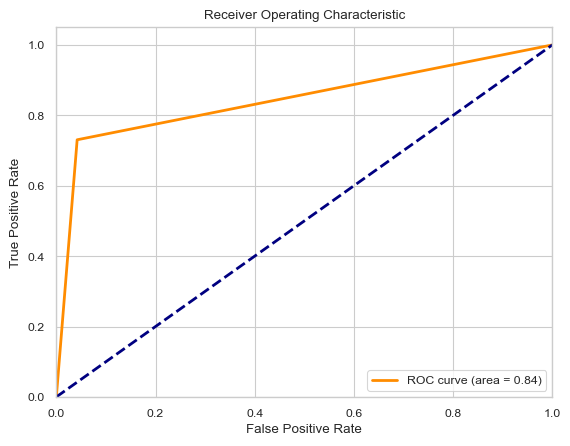

In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



# Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

# Confusion Matrix
print(confusion_matrix(ytest, ypred))

# Classification Report
print(classification_report(ytest, ypred))

[[25516  1618]
 [ 4155  1711]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     27134
           1       0.51      0.29      0.37      5866

    accuracy                           0.83     33000
   macro avg       0.69      0.62      0.64     33000
weighted avg       0.80      0.83      0.80     33000



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': np.arange(0.0, 1.0, 0.1),
    'penalty': ['elasticnet'],
    'loss': ['log'],  # for logistic regression
    'max_iter': [1000],  # You can vary this as well
}

sgd_clf = SGDClassifier()

grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, n_jobs=-1, cv=5, scoring='recall', verbose=2)

grid_search.fit(xtrain, ytrain)

best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(xtest)

print("Best parameters found: ", grid_search.best_params_)
print("Classification Report: ")
print(classification_report(ytest, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:  {'alpha': 0.0001, 'l1_ratio': 0.6000000000000001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet'}
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     27134
           1       0.50      0.01      0.01      5866

    accuracy                           0.82     33000
   macro avg       0.66      0.50      0.46     33000
weighted avg       0.77      0.82      0.74     33000



# VIF

In [ ]:
numeric_col = df.select_dtypes(exclude='object').columns

cat_cols = df.select_dtypes(include='object').columns

numeric_col

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

In [ ]:
cat_cols

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score'],
      dtype='object')

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = df[numeric_col]

vif_data = pd.DataFrame()
vif_data['features'] = vif_df.columns
vif_data['vif'] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
vif_data.sort_values(by= 'vif', ascending=False)

features    vif
1              annual_income 865.99
2      monthly_inhand_salary 842.00
12  credit_utilization_ratio  21.51
4            num_credit_card  11.86
8     num_of_delayed_payment  10.47
3          num_bank_accounts  10.40
15           monthly_balance   9.18
0                        age   9.18
5              interest_rate   9.10
14   amount_invested_monthly   8.58
6                num_of_loan   7.83
10      num_credit_inquiries   6.82
11          outstanding_debt   6.13
7        delay_from_due_date   6.01
9       changed_credit_limit   4.59
13       total_emi_per_month   3.19

In [ ]:
df_new = df.drop('monthly_inhand_salary', axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = df_new[df_new.select_dtypes(exclude='object').columns]

vif_data = pd.DataFrame()
vif_data['features'] = vif_df.columns
vif_data['vif'] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
vif_data.sort_values(by= 'vif', ascending=False)

features   vif
1             annual_income 12.13
5    num_of_delayed_payment  8.98
2             interest_rate  8.66
10  amount_invested_monthly  8.45
11          monthly_balance  7.89
3               num_of_loan  7.36
7      num_credit_inquiries  6.65
0                       age  6.28
8          outstanding_debt  6.03
4       delay_from_due_date  5.70
6      changed_credit_limit  4.48
9       total_emi_per_month  2.82

In [ ]:
df_new = df_new.drop('credit_utilization_ratio', axis=1)

In [ ]:
df_new = df_new.drop('num_credit_card', axis=1)

In [ ]:
df_new = df_new.drop('num_bank_accounts', axis=1)

# lable encoding

In [ ]:
df_new.columns

Index(['age', 'occupation', 'annual_income', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [ ]:
# Calculating IV for 'FeatureColumn'
iv = calc_iv(my_df, 'FeatureColumn', 'TargetColumn')
print("Information Value:", iv)

# WOE & IV

### This function is a typical example of feature engineering in data science, 
### particularly in the context of credit scoring or risk modeling, 
### where understanding the predictive power of individual features is crucial.

In [18]:
# Calculate information value
#Function Definition:
def calc_iv(df, feature, target, pr=0):

    #Initializing an Empty List
    lst = []

    #Looping Through Unique Values of the Feature
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i] #The current value of the feature
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    # Constructs a DataFrame from the list, with columns named 'Variable', 'Value', 'All', and 'Bad'
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0] # Filtering the DataFrame -Keeps only the rows where the 'Bad' count is greater than 0.

    #Calculating Additional Columns
    data['Share'] = data['All'] / data['All'].sum() #Share of each feature value
    data['Bad Rate'] = data['Bad'] / data['All'] #Bad Rate (proportion of bad outcomes)
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum()) # Distribution among good and bad outcomes
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum() 
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad']) #Weight of Evidence (WoE)
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum() #Information Value (IV) for the feature

    # Sorting the DataFrame- Sorts the DataFrame based on the 'Variable' and 'Value' columns.
    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    #Conditional Print Statement - If pr is set to 1, the function prints the DataFrame.
    if pr == 1:
        print(data)
        # Returning the IV Value
        return data['IV'].values[0]
        
    else:
        # Returning the IV Value
        return data['IV'].values[0]


In [24]:
# Calculating IV for 'FeatureColumn'
iv = calc_iv(df, 'Occupation', 'Credit_Score', pr=1)
print("Returned DataFrame:\n", iv)

      Variable          Value   All   Bad  Share  Bad Rate  Distribution Good  \
10  Occupation     Accountant  6744  1205   0.07      0.18               0.07   
14  Occupation      Architect  6824  1233   0.07      0.18               0.07   
4   Occupation      Developer  6720  1210   0.07      0.18               0.07   
7   Occupation         Doctor  6568  1164   0.07      0.18               0.07   
2   Occupation       Engineer  6864  1264   0.07      0.18               0.07   
3   Occupation   Entrepreneur  6648  1185   0.07      0.18               0.07   
8   Occupation     Journalist  6536  1254   0.07      0.19               0.06   
5   Occupation         Lawyer  7096  1259   0.07      0.18               0.07   
9   Occupation        Manager  6432  1190   0.06      0.19               0.06   
12  Occupation       Mechanic  6776  1107   0.07      0.16               0.07   
6   Occupation  Media_Manager  6720  1244   0.07      0.19               0.07   
11  Occupation       Musicia

In [22]:
iv

0.006225511251637863

In [8]:
df.head(2)

ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh 23.00 821000265.00  Scientist   
1  5635         3392      2  Aaron Maashoh 23.00 821000265.00  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0       19114.12                1824.84               3.00             4.00   
1       19114.12                1824.84               3.00             4.00   

   Interest_Rate  Num_of_Loan  \
0           3.00         4.00   
1           3.00         4.00   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                 3.00   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                    7.00                 11.27                  4.00   
1                    4.00                 11.27                  4.00   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0       Good            809.98                     26.82              265.00   
1       Good            809.98                     31.94              266.00   

  Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                    No                49.57                    21.47   
1                    No                49.57                    21.47   

                 Payment_Behaviour  Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments           312.49         Good  
1   Low_spent_Large_value_payments           284.63         Good

In [ ]:
df.head()